In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [113]:
#a)

x = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]


model = LinearRegression() 

#Your code:

model.fit(x, y)

#Hint: .fit()

LinearRegression()

-32304.654721028113
[269.46205468]
0.49670880166311393


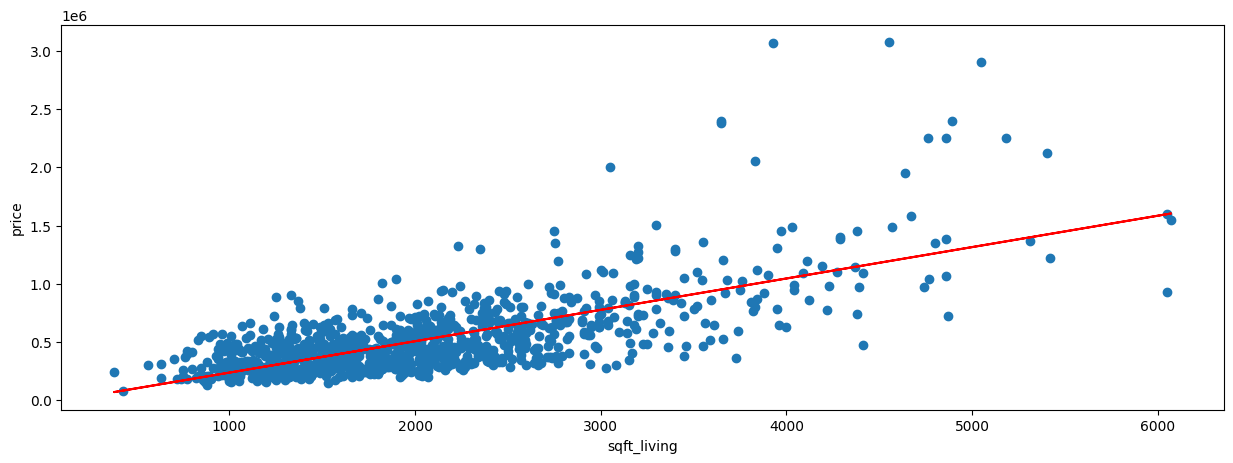

In [114]:
#b)

#Your code:

figure = plt.figure()
figure.set_figwidth(15)
figure.set_figheight(5)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.plot(x, model.predict(x),"r")
plt.scatter(x,y)
print(model.intercept_)
print(model.coef_)
print(model.score(x,y))
plt.show()

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

As we can see linear regression isn't the best at predicting the cost based on sqft as the prices even for the same square footage vary a lot

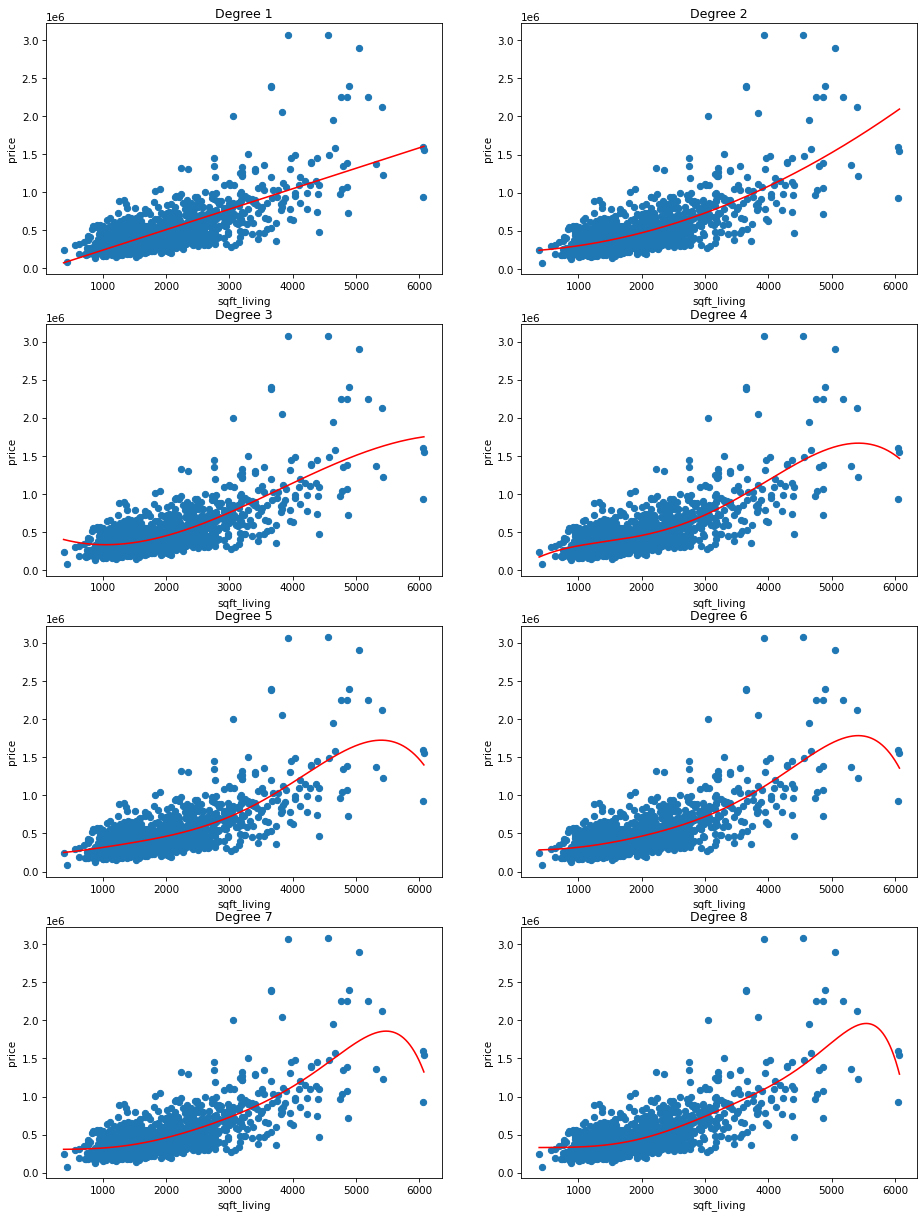

In [115]:
#c)

figure = plt.figure(dpi=75)
figure.set_figwidth(15)
figure.set_figheight(20)

error = []

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(x)


    #Your code:

    model.fit(X_order,y)

    x_graph = np.linspace(x.min(),x.max(),1000).reshape(-1,1)

    y_pred = model.predict(poly.fit_transform(x_graph))


    ax = figure.add_subplot(4,2,order)
    ax.scatter(x,y)
    ax.plot(x_graph,y_pred,'r')
    ax.set(xlabel="sqft_living", ylabel="price", title=f'Degree {order}')

    y_error = model.predict(X_order)
    error.append(mean_squared_error(y, y_error))
    

Using polynomials to adjust the curves certainly helps as the model can better fit the curve to the data.

[57947526161.288376, 54822665116.27667, 53785194716.49392, 52795774757.6403, 52640881343.12396, 52534037974.60295, 52454788439.715065, 52515109066.97536]


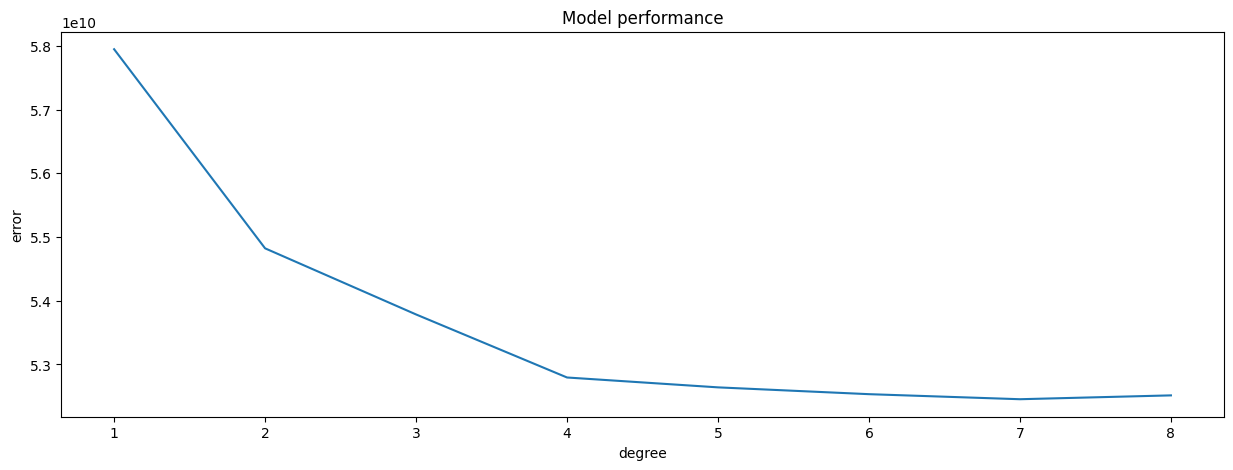

In [116]:
#Your code:
degree = [1,2,3,4,5,6,7,8]
print(error)
figure = plt.figure()
figure.set_figwidth(15)
figure.set_figheight(5)
plt.plot(degree, error)
plt.title("Model performance")
plt.xlabel('degree')
plt.ylabel('error')
plt.show()

As seen the degree of the polynomial reduces the error but there are limits as we can see after the 6th degree the reduction in error is minimal and it even goes up a little at 8th degree.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

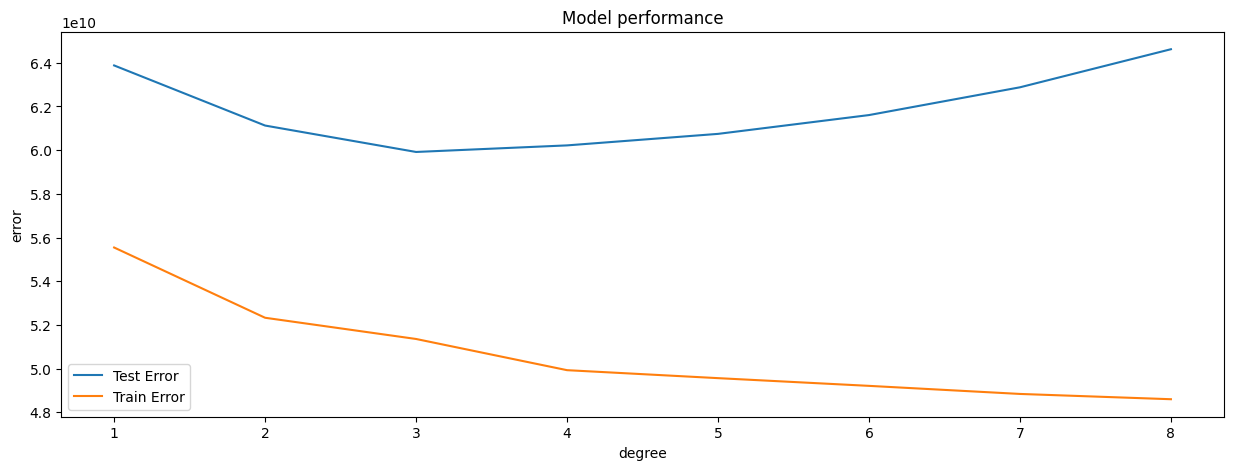

In [117]:
#a)

error_train, error_test, degree = [], [], []
model = LinearRegression()

for order in range(1,9):

    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=44)
    
    poly = PolynomialFeatures(order, include_bias = False)
    x_train_poly = poly.fit_transform(X_train)
    x_test_poly = poly.fit_transform(X_test)

    model.fit(x_train_poly, y_train)

    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    error_train.append(mean_squared_error(y_train, y_train_pred))
    error_test.append(mean_squared_error(y_test, y_test_pred))
    degree.append(order)

figure = plt.figure()
figure.set_figwidth(15)
figure.set_figheight(5)
plt.plot(degree, error_test, label='Test Error')
plt.plot(degree, error_train, label='Train Error')
plt.title("Model performance")
plt.xlabel('degree')
plt.ylabel('error')
plt.legend()
plt.show()

As expected the model is better at predicting data that it has trained on, the new data has bigger error in prediction.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

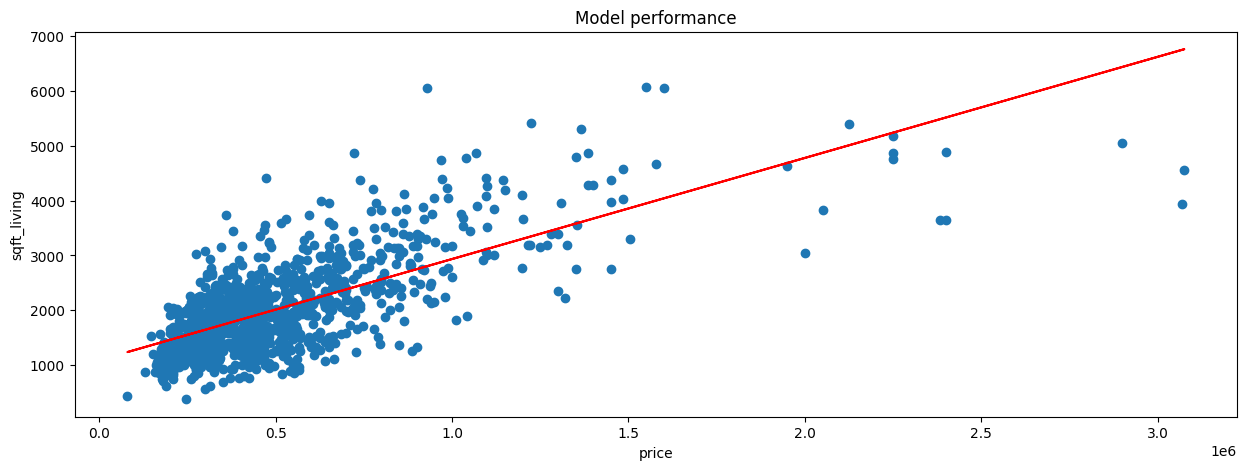

In [118]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

figure = plt.figure()
figure.set_figwidth(15)
figure.set_figheight(5)
plt.plot(X, y_pred, color = 'r')
plt.scatter(X, y)
plt.title("Model performance")
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.show()

In [119]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:

X = house_df[['sqft_living', 'condition', 'yr_renovated', 'lat','grade','yr_built']].values.reshape(-1,6)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


Mean squared error equals: 48749212383.53216
Mean squared error equals: 31902053369.904564


I decided to change X values used to predict. I added condition, year renovated, latitude, grade and year build. I also reduced the size of test data to 0.1 and random state to 40.